In [1]:
import numpy as np
import scipy.io
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pickle

In [2]:
data_train = scipy.io.loadmat("separable_case/train_separable.mat")
data_test = scipy.io.loadmat("separable_case/test_separable.mat")

A = data_train["A"]
B = data_train["B"]

test = data_test["X_test"]
test_label = data_test["true_labels"].ravel()

In [2]:
data_train = scipy.io.loadmat("overlap_case/train_overlap.mat")
data_test = scipy.io.loadmat("overlap_case/test_overlap.mat")

A = data_train["A"]
B = data_train["B"]

test = data_test["X_test"]
test_label = data_test["true_labels"].ravel()

In [3]:
u_0 = scipy.special.softmax(np.random.uniform(0, 1, (100, 1)))
v_0 = scipy.special.softmax(np.random.uniform(0, 1, (100, 1)))

In [4]:
with open("data_plot/q3_reduced_c_hull_data.pickle", "rb") as f:
    data = pickle.load(f)

time_list = data["time_list"]
uv_list = data["uv_list"]
prob_vals = data["prob_vals"]

## Plot evolution

In [5]:
uv_list = [[u_0, v_0]] + uv_list

In [6]:
for i in range(len(uv_list)):
    u_opt = uv_list[i][0]
    v_opt = uv_list[i][1]

    A_opt = np.matmul(A, u_opt)
    B_opt = np.matmul(B, v_opt)

    gamma = 0.5*(np.linalg.norm(A_opt)**2-np.linalg.norm(B_opt)**2)
    normal_vector = A_opt - B_opt
    normal_vector = normal_vector

    x_lin = np.linspace(-5, 5, 500)
    y_lin = (-x_lin*normal_vector[0][0] + gamma)/normal_vector[1][0]
    
    fig = plt.figure(figsize=(8,8))
    plt.scatter(A[0,:],A[1,:], alpha=0.5, color='g', label='Class A')
    plt.scatter(B[0,:],B[1,:], alpha=0.5, color='r', label='Class B')

    # plot optimal point
    plt.scatter(A_opt[0], A_opt[1], alpha=1, s=180, facecolors='none', edgecolors='b', label='support vectors')
    plt.scatter(B_opt[0], B_opt[1], alpha=1, s=180, facecolors='none', edgecolors='b')

    # plot hyperplane
    plt.plot(x_lin, y_lin, label='trained classifier', color='black')
    plt.plot([A_opt[0], B_opt[0]], [A_opt[1], B_opt[1]], alpha=0.5, ls="dotted", label='normal vector', color='black')

    plt.title("Problem 3 - Overlap - Plot training data - iteration {}".format(i+1))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc="upper left")
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    # plt.show()
    plt.tight_layout()
    fig.savefig("data_plot/plot_evolve_q3_rchull/iter_{}.jpeg".format(i+1))
    plt.close()

## Plot graph CHull

In [7]:
data_chull = [
    "data_plot/q3_c_hull_data.pickle",
    "data_plot/q2a_c_hull_data.pickle",
    "data_plot/q2b_c_hull_data.pickle",
]

data_rchull = [
    "data_plot/q3_reduced_c_hull_data.pickle",
    "data_plot/q2a_reduced_c_hull_data.pickle",
    "data_plot/q2b_reduced_c_hull_data.pickle"
]

In [25]:
with open("data_plot/q2a_c_hull_data.pickle", "rb") as f:
    data = pickle.load(f)

time_list_projected_grad = data["time_list"]
prob_vals_projected_grad = data["prob_vals"]
print(len(time_list_projected_grad))
print(len(prob_vals_projected_grad))

with open("data_plot/q2b_c_hull_data.pickle", "rb") as f:
    data = pickle.load(f)

time_list_projected_grad_nesterov = data["time_list"]
prob_vals_projected_grad_nesterov = data["prob_vals"]
print(len(time_list_projected_grad_nesterov))
print(len(prob_vals_projected_grad_nesterov))

with open("data_plot/q3_c_hull_data.pickle", "rb") as f:
    data = pickle.load(f)

time_list_admm = data["time_list"]
prob_vals_admm = data["prob_vals"]
print(len(time_list_admm))
print(len(prob_vals_admm))

21
22
21
23
13
13


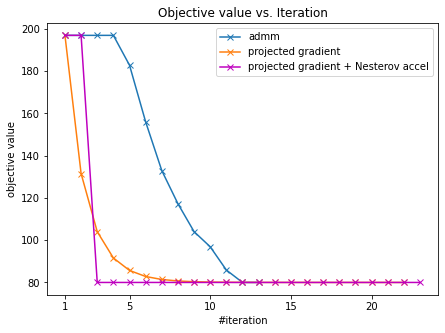

In [46]:
fig = plt.figure(figsize=(7,5))

plt.plot(range(1, len(prob_vals_admm)+1), prob_vals_admm, marker="x", label="admm")
plt.plot(range(1, len(prob_vals_projected_grad)+1), prob_vals_projected_grad, marker="x", label="projected gradient")
plt.plot(range(1, len(prob_vals_projected_grad_nesterov)+1), prob_vals_projected_grad_nesterov, marker="x", c="m", label="projected gradient + Nesterov accel")

plt.legend()
plt.xticks([1,5,10,15,20])
plt.ylabel("objective value")
plt.xlabel("#iteration")
plt.title("C-Hull - Objective value vs. Iteration")
plt.show()

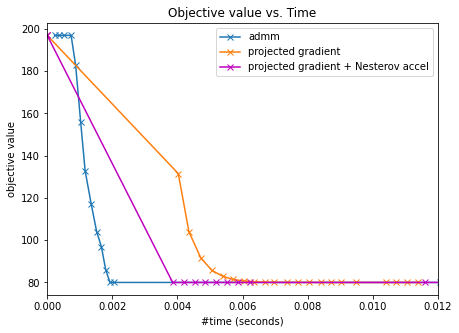

In [45]:
fig = plt.figure(figsize=(7,5))

plt.plot(np.cumsum(time_list_admm + [0.01]), prob_vals_admm+[prob_vals_admm[-1]], marker="x", label="admm")
plt.plot(np.cumsum([0] + time_list_projected_grad), prob_vals_projected_grad, marker="x", label="projected gradient")
plt.plot(np.cumsum([0,0] + time_list_projected_grad_nesterov), prob_vals_projected_grad_nesterov, c="m", marker="x", label="projected gradient + Nesterov accel")

plt.legend()
# plt.xticks([1,5,10,15,20])
plt.xlim(0,0.012)
plt.ylabel("objective value")
plt.xlabel("#time (seconds)")
plt.title("C-Hull - Objective value vs. Time")
plt.show()

## Plot graph RCHull

In [7]:
data_chull = [
    "data_plot/q3_c_hull_data.pickle",
    "data_plot/q2a_c_hull_data.pickle",
    "data_plot/q2b_c_hull_data.pickle",
]

data_rchull = [
    "data_plot/q3_reduced_c_hull_data.pickle",
    "data_plot/q2a_reduced_c_hull_data.pickle",
    "data_plot/q2b_reduced_c_hull_data.pickle"
]

In [47]:
with open("data_plot/q2a_reduced_c_hull_data.pickle", "rb") as f:
    data = pickle.load(f)

time_list_projected_grad = data["time_list"]
prob_vals_projected_grad = data["prob_vals"]
print(len(time_list_projected_grad))
print(len(prob_vals_projected_grad))

with open("data_plot/q2b_reduced_c_hull_data.pickle", "rb") as f:
    data = pickle.load(f)

time_list_projected_grad_nesterov = data["time_list"]
prob_vals_projected_grad_nesterov = data["prob_vals"]
print(len(time_list_projected_grad_nesterov))
print(len(prob_vals_projected_grad_nesterov))

with open("data_plot/q3_reduced_c_hull_data.pickle", "rb") as f:
    data = pickle.load(f)

time_list_admm = data["time_list"]
prob_vals_admm = data["prob_vals"]
print(len(time_list_admm))
print(len(prob_vals_admm))

21
22
21
23
7
7


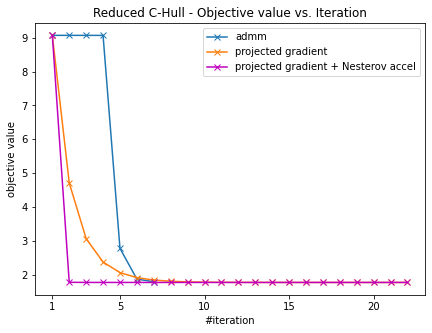

In [58]:
fig = plt.figure(figsize=(7,5))

plt.plot(range(1, len(prob_vals_admm)+1), prob_vals_admm, marker="x", label="admm")
plt.plot(range(1, len(prob_vals_projected_grad)+1), prob_vals_projected_grad, marker="x", label="projected gradient")
plt.plot(range(1, len(prob_vals_projected_grad_nesterov)), prob_vals_projected_grad_nesterov[1:], marker="x", c="m", label="projected gradient + Nesterov accel")

plt.legend()
plt.xticks([1,5,10,15,20])
plt.ylabel("objective value")
plt.xlabel("#iteration")
plt.title("Reduced C-Hull - Objective value vs. Iteration")
plt.show()

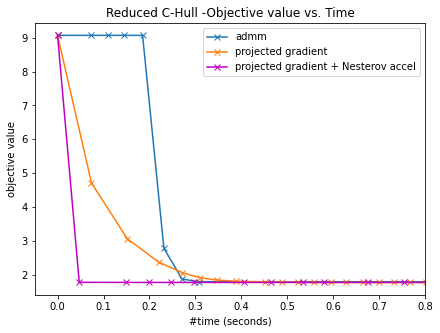

In [59]:
fig = plt.figure(figsize=(7,5))

plt.plot(np.cumsum([0] + time_list_admm + [0.8]), [prob_vals_admm[0]] + prob_vals_admm+[prob_vals_admm[-1]], marker="x", label="admm")
plt.plot(np.cumsum([0] + time_list_projected_grad), prob_vals_projected_grad, marker="x", label="projected gradient")
plt.plot(np.cumsum([0] + time_list_projected_grad_nesterov), prob_vals_projected_grad_nesterov[1:], c="m", marker="x", label="projected gradient + Nesterov accel")

plt.legend()
# plt.xticks([1,5,10,15,20])
plt.xlim(-0.05,0.8)
plt.ylabel("objective value")
plt.xlabel("#time (seconds)")
plt.title("Reduced C-Hull -Objective value vs. Time")
plt.show()